In [1]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline
df=pd.read_csv('Survived.csv')
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C


In [2]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.shape

(891, 11)

In [5]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [6]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [7]:
col=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
x=df[col]
t=df['Survived']

In [8]:
x_train, x_test, y_train, y_test=train_test_split(x,t,test_size=0.2,random_state=0)
x_train.shape

(712, 5)

In [9]:
model=tree.DecisionTreeClassifier(max_depth=5,random_state=0,class_weight='balanced')
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

In [11]:
model.score(X=x_test,y=y_test)

0.7374301675977654

In [12]:
def learn(x,t,depth=3):
    x_train,x_test,y_train,y_test=train_test_split(x,t,test_size=0.2,random_state=0)
    model=tree.DecisionTreeClassifier(max_depth=depth,random_state=0,class_weight='balanced')
    model.fit(x_train,y_train)

    score=model.score(X=x_train,y=y_train)
    score2=model.score(X=x_test,y=y_test)
    return round(score,3),round(score2,3),model

In [13]:
for j in range(1,15):
    train_score,test_score,model=learn(x,t,depth=j)
    sentence='訓練データの正解率{}'
    sentence2='テストデータの正解率{}'
    total_sentence='深さ{}:'+sentence+sentence2
    print(total_sentence.format(j,train_score,test_score))

深さ1:訓練データの正解率0.659テストデータの正解率0.704
深さ2:訓練データの正解率0.699テストデータの正解率0.732
深さ3:訓練データの正解率0.704テストデータの正解率0.737
深さ4:訓練データの正解率0.698テストデータの正解率0.726
深さ5:訓練データの正解率0.722テストデータの正解率0.737
深さ6:訓練データの正解率0.77テストデータの正解率0.698
深さ7:訓練データの正解率0.771テストデータの正解率0.648
深さ8:訓練データの正解率0.781テストデータの正解率0.631
深さ9:訓練データの正解率0.83テストデータの正解率0.704
深さ10:訓練データの正解率0.851テストデータの正解率0.687
深さ11:訓練データの正解率0.878テストデータの正解率0.676
深さ12:訓練データの正解率0.892テストデータの正解率0.654
深さ13:訓練データの正解率0.909テストデータの正解率0.654
深さ14:訓練データの正解率0.92テストデータの正解率0.654


In [14]:
df2=pd.read_csv('Survived.csv')
print(df2['Age'].mean())
print(df2['Age'].median())

29.69911764705882
28.0


In [15]:
df2.groupby('Survived').mean()['Age']

C:\Users\yoshikoshi\AppData\Local\Temp\ipykernel_10832\2585321801.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('Survived').mean()['Age']


Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [16]:
df2.groupby('Pclass').mean()['Age']

C:\Users\yoshikoshi\AppData\Local\Temp\ipykernel_10832\1601801207.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('Pclass').mean()['Age']


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [17]:
pd.pivot_table(df2,index='Survived',columns='Pclass',values='Age')

Pclass,1,2,3
Survived,,,
0,43.695312,33.544444,26.555556
1,35.368197,25.901566,20.646118


In [18]:
pd.pivot_table(df2,index='Survived',columns='Pclass',values='Age',aggfunc=max)

Pclass,1,2,3
Survived,,,
0,71.0,70.0,74.0
1,80.0,62.0,63.0


In [19]:
is_null=df2['Age'].isnull()
df2.loc[(df2['Pclass']==1) & (df2['Survived']==0) & (is_null),'Age']=43
df2.loc[(df2['Pclass']==1) & (df2['Survived']==1) & (is_null),'Age']=35

df2.loc[(df2['Pclass']==2) & (df2['Survived']==0) & (is_null),'Age']=33
df2.loc[(df2['Pclass']==2) & (df2['Survived']==1) & (is_null),'Age']=25

df2.loc[(df2['Pclass']==3) & (df2['Survived']==0) & (is_null),'Age']=26
df2.loc[(df2['Pclass']==3) & (df2['Survived']==1) & (is_null),'Age']=20

In [20]:
col=['Pclass','Age','SibSp','Parch','Fare']
x=df2[col]
t=df2['Survived']

for j in range(1,15):
    s1,s2,m=learn(x,t,depth=j)
    sentence='深さ{}:訓練データの精度{}::テストデータの精度{}'
    print(sentence.format(j,s1,s2))

深さ1:訓練データの精度0.659::テストデータの精度0.704
深さ2:訓練データの精度0.699::テストデータの精度0.67
深さ3:訓練データの精度0.722::テストデータの精度0.715
深さ4:訓練データの精度0.74::テストデータの精度0.704
深さ5:訓練データの精度0.76::テストデータの精度0.726
深さ6:訓練データの精度0.794::テストデータの精度0.793
深さ7:訓練データの精度0.819::テストデータの精度0.749
深さ8:訓練データの精度0.84::テストデータの精度0.749
深さ9:訓練データの精度0.885::テストデータの精度0.743
深さ10:訓練データの精度0.906::テストデータの精度0.732
深さ11:訓練データの精度0.93::テストデータの精度0.726
深さ12:訓練データの精度0.947::テストデータの精度0.737
深さ13:訓練データの精度0.961::テストデータの精度0.732
深さ14:訓練データの精度0.969::テストデータの精度0.721


In [22]:
sex=df2.groupby('Sex').mean()
sex['Survived']

C:\Users\yoshikoshi\AppData\Local\Temp\ipykernel_10832\516114782.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sex=df2.groupby('Sex').mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<Axes: xlabel='Sex'>

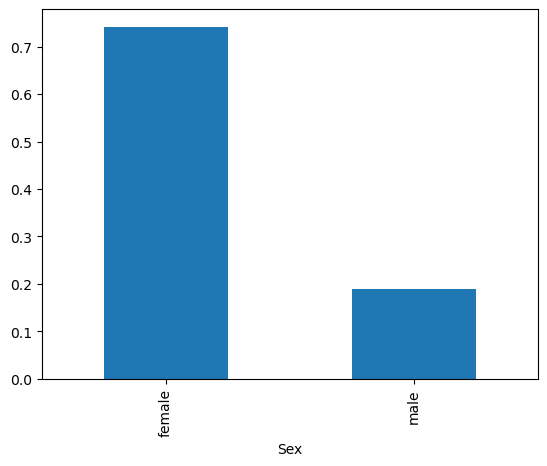

In [23]:
sex['Survived'].plot(kind='bar')

In [26]:
col=['Pclass','Age','SibSp','Parch','Fare','Sex']
x=df2[col]
t=df2['Survived']
train_score,test_score,model=learn(x,t)

ValueError: could not convert string to float: 'female'

In [27]:
male=pd.get_dummies(df2['Sex'],drop_first=True)
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [31]:
pd.get_dummies(df2['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [32]:
pd.get_dummies(df2['Embarked'],drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [33]:
embarked=pd.get_dummies(df2['Embarked'],drop_first=False)
embarked.head(3)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1


In [34]:
x_temp=pd.concat([x,male],axis=1)
x_temp.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex,male
0,3,22.0,1,0,7.2500,male,1
1,1,38.0,1,0,71.2833,female,0


In [35]:
tmp=pd.concat([x,x],axis=0)
tmp.shape


(1782, 6)

In [36]:
x_new=x_temp.drop('Sex',axis=1)
for j in range(1,6):
    s1,s2,m=learn(x_new,t,depth=j)
    s='深さ{}:訓練データの精度{}::テストデータの精度{}'
    print(s.format(j,s1,s2))

深さ1:訓練データの精度0.787::テストデータの精度0.788
深さ2:訓練データの精度0.792::テストデータの精度0.782
深さ3:訓練データの精度0.847::テストデータの精度0.81
深さ4:訓練データの精度0.854::テストデータの精度0.849
深さ5:訓練データの精度0.865::テストデータの精度0.86


In [37]:
s1,s2,model=learn(x_new,t,depth=5)

import pickle
with open('survived.pkl','wb')as f:
    pickle.dump(model,f)

In [38]:
model.feature_importances_

array([0.12084767, 0.25107251, 0.06754808, 0.00275855, 0.05145686,
       0.50631633])

In [39]:
pd.DataFrame(model.feature_importances_,index=x_new.columns)

,0
Pclass,0.120848
Age,0.251073
SibSp,0.067548
Parch,0.002759
Fare,0.051457
male,0.506316
